<a href="https://colab.research.google.com/github/Mariana-Arantes/data_science/blob/main/Analisando_a_Viol%C3%AAncia_no_Rio_de_Janeiro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# Analisando a Violência no Rio de Janeiro


<center><img alt="Rio de Janeiro" width="40%" src="https://raw.githubusercontent.com/Mariana-Arantes/data_science/main/violencia_rio.PNG"></center>

Infelizmente violência e criminalidade são problemas de contexto mundial e uma cidade do Brasil que vem ganhando cada vez mais o destaque nos noticiários é o Rio de Janeiro.

O tráfico de drogas e de armas que cresceu no fim da décadade 80, foi responsável pela mudança na criminalidade na cidade. A violência instalada  dentro das comunidades carentes, forneceu também uma visão assustadora  para os bairros "nobres" da cidade em forma de balas perdidas, "arrastões", assaltos, seqüestros e latrocínios. 

E para nos ajudar a entender um pouco mais deste cenário, as leis de acesso à informação e a conscientização dos órgãos públicos, passaram a disponibilizar várias fontes de dados.

Iremos analisar aqui os dados abertos disponibilizados pelo Instituto de Segurança Pública do Rio de Janeiro, com informações do histórico mensal das delegacias do desde 1991.
  

  

## Obtenção dos Dados

Os dados foram obtidos no [Portal ISPDados](http://www.ispdados.rj.gov.br/estatistica.html).

Este *dataset* utilizado aqui pode pode ser baixado diretamente [neste link](https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/violencia_rio.csv).





### Importando os dados



In [50]:
#importa a biblioteca necessária
import pandas as pd
import seaborn as sns
df = pd.read_csv("https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/violencia_rio.csv")

## Análise Inicial dos Dados

Podemos verificar abaixo que o DataFrame utilizado possui 56 colunas e 344 linhas. Vemos também o nome de todas as colunas, tipos e se possuem dados ausentes.

Esse tipo de informação é bastante útil, e nos ajudará a direcionar o trabalho na fase de limpeza dos dados.

In [6]:
# Mostra o tamanho, nome e tipo das colunas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 56 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   vano                        344 non-null    int64  
 1   mes                         344 non-null    int64  
 2   hom_doloso                  344 non-null    int64  
 3   lesao_corp_morte            248 non-null    float64
 4   latrocinio                  344 non-null    int64  
 5   hom_por_interv_policial     260 non-null    float64
 6   tentat_hom                  344 non-null    int64  
 7   lesao_corp_dolosa           344 non-null    int64  
 8   estupro                     200 non-null    float64
 9   hom_culposo                 260 non-null    float64
 10  lesao_corp_culposa          248 non-null    float64
 11  roubo_comercio              344 non-null    int64  
 12  roubo_residencia            344 non-null    int64  
 13  roubo_veiculo               344 non

Vamos agora dar uma olhada como este Dataset está organizado e como os dados são apresentados.


In [7]:
#Visualiza as 5 primeiras linhas
df.head()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
0,1991,1,657,NaN,15,NaN,162,3051,NaN,NaN,NaN,350,188,1174,63,967,381,37,NaN,NaN,NaN,NaN,NaN,158,3318,2009,1147,NaN,NaN,NaN,3561,6717,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,872,NaN,NaN,NaN,NaN,NaN,NaN,217,NaN,NaN,NaN,672,1348,1174,NaN,3
1,1991,2,732,NaN,17,NaN,175,3421,NaN,NaN,NaN,357,171,1097,64,963,432,35,NaN,NaN,NaN,NaN,NaN,142,3261,1850,1066,NaN,NaN,NaN,3309,6225,NaN,NaN,NaN,NaN,127,NaN,NaN,NaN,751,NaN,NaN,NaN,NaN,NaN,NaN,209,NaN,NaN,NaN,749,1395,1097,NaN,3
2,1991,3,713,NaN,25,NaN,216,3613,NaN,NaN,NaN,443,191,1265,71,963,422,43,NaN,NaN,NaN,NaN,NaN,131,3529,2084,1062,NaN,NaN,NaN,3573,6719,NaN,NaN,NaN,NaN,80,NaN,NaN,NaN,789,NaN,NaN,NaN,NaN,NaN,NaN,188,NaN,NaN,NaN,738,1385,1265,NaN,3
3,1991,4,634,NaN,20,NaN,200,3211,NaN,NaN,NaN,425,199,1415,81,1186,354,36,NaN,NaN,NaN,NaN,NaN,112,3808,2085,1195,NaN,NaN,NaN,3290,6570,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,787,NaN,NaN,NaN,NaN,NaN,NaN,140,NaN,NaN,NaN,654,1540,1415,NaN,3
4,1991,5,650,NaN,20,NaN,146,3051,NaN,NaN,NaN,553,231,1449,82,931,335,27,NaN,NaN,NaN,NaN,NaN,147,3755,2185,723,NaN,NaN,NaN,3546,6454,NaN,NaN,NaN,NaN,163,NaN,NaN,NaN,845,NaN,NaN,NaN,NaN,NaN,NaN,78,NaN,NaN,NaN,670,1266,1449,NaN,3


Como podemos observar na amostra acima, existem muitos dados ausentes.
Dependendo do percentual de dados faltantes de uma coluna específica, teremos que realizar alguns processos para que a nossa análise estatística seja o mais assertiva possível.



Em seguida temos o percentual de dados ausentes de cada coluna em ordem crescente, chamando a atenção para as proporções consideráveis dos crimes relacionados a bicicletas e apreensão de drogas.

In [10]:
#Mostra a porcentagem de valores ausentes das colunas
(df.isnull().sum() /df.shape[0]).sort_values(ascending=False)

roubo_bicicleta               0.802326
furto_bicicleta               0.802326
apreensao_drogas_sem_autor    0.523256
posse_drogas                  0.523256
apf                           0.523256
aaapai                        0.523256
cmp                           0.523256
trafico_drogas                0.523256
cmba                          0.523256
sequestro_relampago           0.418605
furto_coletivo                0.418605
extorsao                      0.418605
furto_celular                 0.418605
roubo_apos_saque              0.418605
roubo_conducao_saque          0.418605
roubo_cx_eletronico           0.418605
estupro                       0.418605
estelionato                   0.418605
pol_civis_mortos_serv         0.418605
pol_militares_mortos_serv     0.418605
pessoas_desaparecidas         0.383721
encontro_ossada               0.383721
roubo_celular                 0.313953
lesao_corp_culposa            0.279070
ameaca                        0.279070
sequestro                

## Informações Estatísticas da Violência no Rio de Janeiro

Utilizando o método esse método `describe`, teremos um resumo estatístico com informações que podem nos ajudar a:

* Identificar outliers.
* Entender melhor a distribuição dos dados.
* Identificar falhas na distribuição dos dados.
* Após a limpeza dos dados, verificar a eficácia e as diferenças entre os dados tratados e não tratados.




In [ ]:
# Imprimir o resumo estatístico do DataFrame
df.describe()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
count,344.000000,344.000000,344.000000,248.000000,344.000000,260.00000,344.000000,344.000000,200.000000,260.000000,248.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,200.000000,236.000000,200.000000,200.000000,68.000000,344.000000,344.000000,344.000000,344.000000,200.000000,200.000000,68.000000,344.000000,344.000000,248.000000,200.000000,200.000000,200.000000,344.000000,164.000000,164.000000,164.000000,344.000000,164.000000,164.000000,164.000000,164.000000,248.000000,212.000000,344.000000,212.000000,200.000000,200.00000,344.000000,344.000000,344.000000,248.000000,344.000000
mean,2004.837209,6.453488,504.555233,4.334677,15.668605,71.90000,318.267442,5492.799419,369.945000,212.119231,3410.762097,455.005814,133.284884,2448.697674,340.322674,3418.520349,659.002907,9.375000,3.550000,957.974576,11.320000,145.665000,10.808824,1211.223837,9428.119186,1674.671512,1518.921512,650.230000,1449.175000,124.808824,5994.328488,10433.177326,0.665323,133.265000,7.755000,2231.860000,1071.930233,609.237805,759.146341,186.146341,1772.238372,2319.585366,568.628049,1255.512195,83.042683,5530.326613,435.132075,66.261628,3.301887,2.085000,0.34000,577.691860,4734.738372,2448.697674,53794.161290,2.994186
std,8.289036,3.447759,113.774481,2.755357,5.861427,36.48882,127.606645,1514.220579,94.392434,54.234700,776.156561,119.765076,44.317963,789.689559,223.855243,2459.017549,297.622342,10.564894,2.634808,624.309034,6.404113,55.392367,7.767628,800.576723,4578.013053,294.852020,971.853102,268.836273,368.638776,80.247427,1964.767779,3696.725756,0.959128,43.303821,5.089646,772.093064,643.381991,246.307700,312.871487,36.221243,656.761843,650.520866,248.040620,357.035450,62.951374,1100.752625,65.353516,34.464519,2.192922,1.761616,0.63752,104.973929,3204.054864,789.689559,11039.051992,0.076138
min,1991.000000,1.000000,272.000000,0.000000,2.000000,10.00000,122.000000,2350.000000,188.000000,111.000000,848.000000,243.000000,49.000000,1097.000000,59.000000,688.000000,281.000000,0.000000,0.000000,0.000000,1.000000,11.000000,0.000000,81.000000,3261.000000,1159.000000,322.000000,23.000000,484.000000,0.000000,2322.000000,4691.000000,0.000000,23.000000,0.000000,717.000000,80.000000,248.000000,262.000000,114.000000,729.000000,1173.000000,225.000000,628.000000,21.000000,1409.000000,236.000000,0.000000,0.000000,0.000000,0.00000,334.000000,1086.000000,1097.000000,30621.000000,2.000000
25%,1998.000000,3.000000,413.750000,2.000000,11.000000,41.75000,200.000000,4067.000000,282.000000,176.000000,3040.000000,365.750000,103.750000,1889.750000,208.250000,1053.000000,430.750000,2.000000,2.000000,549.750000,6.000000,106.000000,2.250000,811.750000,5107.750000,1430.500000,732.000000,501.000000,1297.000000,3.750000,3978.000000,6700.250000,0.000000,109.750000,4.750000,1654.500000,714.500000,360.500000,426.000000,160.000000,1276.750000,1681.000000,332.500000,950.500000,46.000000,4868.500000,390.000000,42.000000,2.000000,1.000000,0.00000,500.000000,1557.000000,1889.750000,45374.500000,3.000000
50%,2005.000000,6.000000,507.000000,4.000000,15.000000,70.00000,318.500000,5830.500000,384.000000,203.000000,3372.000000,433.500000,125.000000,2322.000000

### Crimes Contra o Patrimônio - Veículos
Os crimes relacionados a roubo e furto de veículos é um problema comum nas grandes metrópoles brasileiras. Iremos então utilizar as informações contidas neste dataset para encontrar resultados pertinentes em relação à situação e ao combate a esse tipo de crime.

Analisando os resultados abaixo, podemos observar que 42.98% dos veículos roubados ou furtados foram recuperados.

In [46]:
# Mostra a média das variáveis roubo_veiculo, furto_veiculos e recuperacao_veiculos
mean_roubo_veiculo = round(df.roubo_veiculo.mean(),2)
mean_furto_veiculos = round(df.furto_veiculos.mean(),2)
mean_recuperacao_veiculos = round(df.recuperacao_veiculos.mean(),2)

print (('Média de roubo a veículos: '), mean_roubo_veiculo)
print (('Média de furto a veículos: '), mean_furto_veiculos)
print (('Média de recuperação de veículos: '), mean_recuperacao_veiculos)


# Mostra o total de veículos perdidos
total = mean_roubo_veiculo + mean_furto_veiculos
print('Média total de Veículos Perdidos por Mês: {:.2f} '.format(total))
print('Veículos Recuperados por Mês: {:.2f}'.format(mean_recuperacao_veiculos))

# Mostra a porcentagem de veículos recuperados
pct = mean_recuperacao_veiculos/total*100

print('Veículos recuperados: {:.2f}%'.format(pct))

Média de roubo a veículos:  2448.7
Média de furto a veículos:  1674.67
Média de recuperação de veículos:  1772.24
Média total de Veículos Perdidos por Mês: 4123.37 
Veículos Recuperados por Mês: 1772.24
Veículos recuperados: 42.98%


### Crimes Contra a Vida

Vamos agora identificar qual foi o máximo e mínimo registrado para a variável `hom_doloso` ao longo do período observado no dataset.
Podemos ver que no mês com menor número de casos foram registrados 272 homicídios dolosos.

Em relação ao mês com números mais elevado, houveram 831 homicídios dolosos.

In [47]:
# valores max e min de hom_doloso
max_hom_doloso = df.hom_doloso.max()
min_hom_doloso = df.hom_doloso.min()

# imprimir os valores máximos e mínimos
print("Min:\t{}".format(min_hom_doloso))
print("Max:\t{}".format(max_hom_doloso))

Min:	272
Max:	831


Abaixo, vemos que Julho de 2015 foi o mês com menos casos de homicídios dolosos registrados no nosso dataset, enquanto Janeiro de 1995 foi o mês com maior número de casos.


In [48]:
# verificando o mês com menor número de homicídios dolosos
df[df.hom_doloso == 272]

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
293,2015,6,272,2.0,16,44.0,477,5535,389.0,140.0,3369.0,465,96,2254,566,4421,619,3,1.0,896.0,5.0,106.0,3.0,1243,10678,1333,2974,968.0,1514.0,5.0,7475,14269,0.0,192.0,10.0,2940.0,2134,845.0,1134.0,204.0,1768,3128.0,798.0,1676.0,57.0,5678.0,493.0,52,4.0,1.0,1.0,334,5936,2254,60357.0,3


In [49]:
# verificando o mês com maior número de homicídios dolosos
df[df.hom_doloso == 831]

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
48,1995,1,831,NaN,17,NaN,166,3626,NaN,NaN,NaN,323,174,2060,188,1056,377,38,NaN,NaN,NaN,NaN,NaN,134,4350,1924,520,NaN,NaN,NaN,2941,5385,NaN,NaN,NaN,NaN,147,NaN,NaN,NaN,1435,NaN,NaN,NaN,NaN,NaN,NaN,98,NaN,NaN,NaN,848,1433,2060,NaN,3


## Visualização de Dados

Para nos ajudar a entender a distribuição dos valores em uma variável, usaremos o Histograma para mostrar a frequencia dos dados.

Abaixo, faremos essa análise em relação à variável `hom_doloso` e alguns dados chamam a nossa atenção, como:

* Houveram quase 70 meses com 500-550 homicídios dolosos registrados ao longo do período em estudo.
* Houveram menos de 10 meses ao longo de todo o período estudado na casa de 800 registros de homicídio doloso.

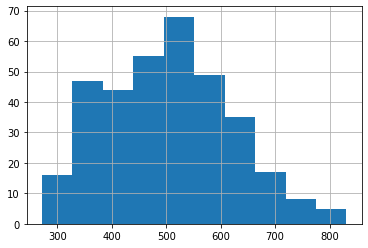

In [ ]:
df.hom_doloso.hist();

Neste gráfico podemos observar que nos últimos anos, o homicídio doloso diminiu considerávelmente.

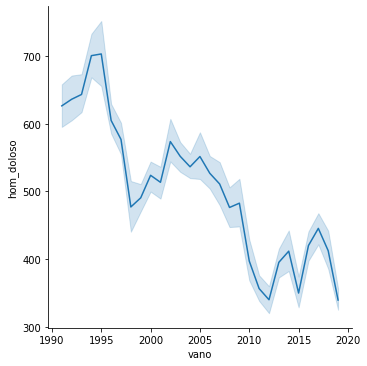

In [67]:
sns.relplot(kind="line", x="vano", y="hom_doloso", palette="Set2", data=df);

Por último, vamos analisar a variável `roubo_em_coletivo` utilizando um gráfico de linha.

O eixo Y do gráfico nos mostra a quantidade de roubos e o eixo x os meses, sendo no total 344 meses de janeiro de 1991 até agosto de 2019.

Podemos ver que a quantidade de roubos em coletivo teve um aumento drástico nos últimos anos.

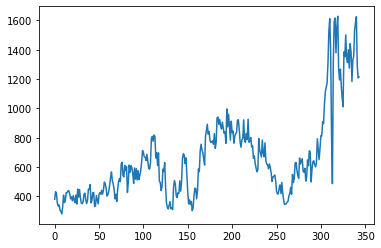

In [18]:
df.roubo_em_coletivo.plot()

## Conclusão

Fizemos aqui uma análise bem simples da base de dados da polícia militar sobre a violência no Rio de Janeiro.
Como estarmos utilizando um dataset com dados reais, perdemos muitas informações pela ausencia de dados e presença de outliers, reforçando a importância de realizar o tratamento dos dados de forma preliminar.

Vale lembrar que a etapa de aquisição, tratamento e exploração dos dados consumiu a maior parte do tempo de projeto, porém, foi esta etapa que permitiu extrair algumas informações relevantes e sobre violência no Rio de Janeiro.


